In [194]:
# Import necessary libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [21]:
# Load the dataset

In [63]:
df = pd.read_excel('PlayerData.xlsx')
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [64]:
# Step 1: Preprocessing the data
# Handle missing values by filling with mean or median for numeric columns



In [65]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [66]:
# Step 2: Feature Engineering - Adding more meaningful metrics
# Calculate Workload Index (based on touches, tackles, and aerial duels)
# Calculate Intensity Score (based on shots, carries, tackles, fouls)

In [67]:
df['Workload'] = df['Touches'] + df['Tkl'] + df['AerWon'] + df['CarTotDist']
df['Intensity'] = df['Shots'] + df['Carries'] + df['Tkl'] + df['Fls']

In [68]:
# Step 3: Injury Risk Prediction Model
# Define features (X) and target (y)
# Ensure that 'InjuryRisk' column exists or create it as needed

In [69]:
if 'InjuryRisk' not in df.columns:
    df['InjuryRisk'] = np.random.choice([0, 1], size=len(df))  # Replace with actual logic

X = df[['Age', 'MP', 'Starts', 'Workload', 'Intensity', 'Tkl', 'Shots', 'Touches']]
y = df['InjuryRisk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [70]:
# Split the data into training and testing sets


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Model - Random Forest Classifier


In [73]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [74]:
# Make predictions

In [75]:
y_pred = model.predict(X_test) 

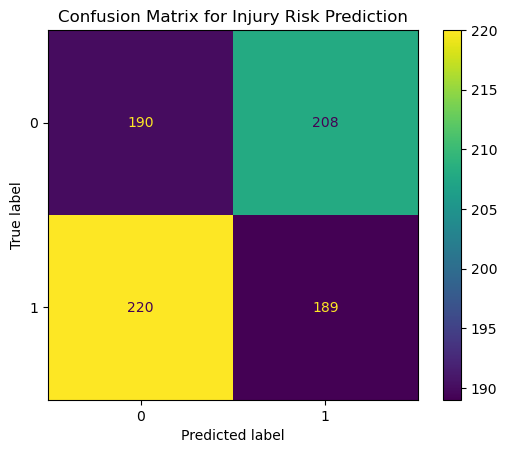

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       398
           1       0.48      0.46      0.47       409

    accuracy                           0.47       807
   macro avg       0.47      0.47      0.47       807
weighted avg       0.47      0.47      0.47       807



In [76]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Injury Risk Prediction')
plt.show()

# Print classification report
report = classification_report(y_test, y_pred)
print(report)


In [77]:
# Step 4: Prediction


In [78]:
y_pred = model.predict(X_test)

In [79]:
# Step 5: Evaluate the model


In [85]:
accuracy = model.score(X_test, y_test)
print(f'Injury Risk Prediction Accuracy: {accuracy}')

Injury Risk Prediction Accuracy: 0.46964064436183395


In [86]:
# Step 6: Health Analytics - Correlating metrics with player injuries
# Visualize player workload and its relationship with injuries


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2140\4220303989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='InjuryRisk', y='Workload', palette="Pastel1")


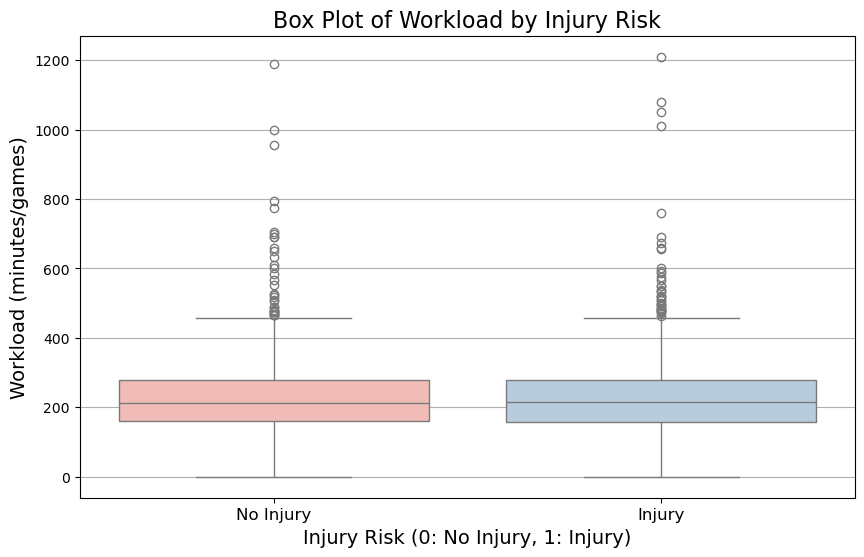

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='InjuryRisk', y='Workload', palette="Pastel1")

# Add title and labels
plt.title("Box Plot of Workload by Injury Risk", fontsize=16)
plt.xlabel("Injury Risk (0: No Injury, 1: Injury)", fontsize=14)
plt.ylabel("Workload (minutes/games)", fontsize=14)

# Customize x-ticks for clarity
plt.xticks(ticks=[0, 1], labels=['No Injury', 'Injury'], fontsize=12)

plt.grid(axis='y')  # Optional: Add grid lines for better readability
plt.show()




In [88]:
# Step 7: Performance Prediction - Goals, Assists


In [89]:
X_performance = df[['Shots', 'Carries', 'PasAss', 'PasProg']]
y_goals = df['Goals']

In [90]:
# Train a linear regression model to predict goals


In [91]:
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_performance, y_goals, test_size=0.3, random_state=42)


In [92]:
reg = LinearRegression()
reg.fit(X_train_perf, y_train_perf)

LinearRegression()

In [93]:
# Predict goals


In [94]:
y_pred_perf = reg.predict(X_test_perf)

In [95]:
# Evaluate the model using R^2 and Mean Squared Error


In [96]:
r2_perf = r2_score(y_test_perf, y_pred_perf)
mse_perf = mean_squared_error(y_test_perf, y_pred_perf)

In [97]:

print(f'R^2 Score for Goal Prediction: {r2_perf}')
print(f'Mean Squared Error for Goal Prediction: {mse_perf}')

R^2 Score for Goal Prediction: 0.11596700316007635
Mean Squared Error for Goal Prediction: 4.333056548808217


In [98]:
# Step 8: Educational Outreach - Generating insights for coaches and students
# Example: Finding top 5 players with the highest workload

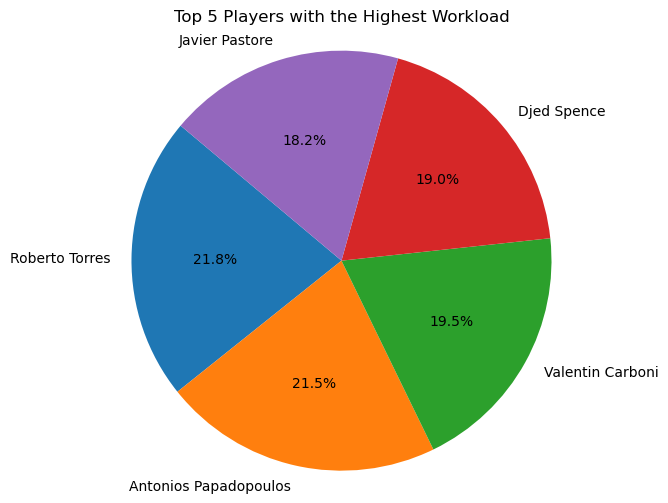

In [99]:

top_workload_players = df[['Player', 'Workload']].sort_values(by='Workload', ascending=False).head(5)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_workload_players['Workload'], labels=top_workload_players['Player'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Players with the Highest Workload')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

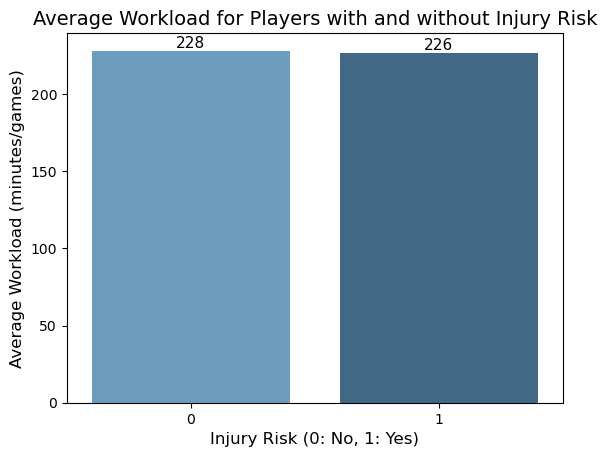

In [100]:
# New Bar Plot: Average Workload by Injury Risk

sns.barplot(data=df, x='InjuryRisk', y='Workload', hue='InjuryRisk', palette="Blues_d", errorbar=None, legend=False)

# Add title and labels
plt.title("Average Workload for Players with and without Injury Risk", fontsize=14)
plt.xlabel("Injury Risk (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Average Workload (minutes/games)", fontsize=12)

# Add values at the top of bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.show()


In [101]:

# Export this data for use in reports or analysis

In [102]:

top_workload_players.to_csv('Top_Workload_Players.csv', index=False)